In [11]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import make_multilabel_classification
import torch.optim as optim
import pandas as pd

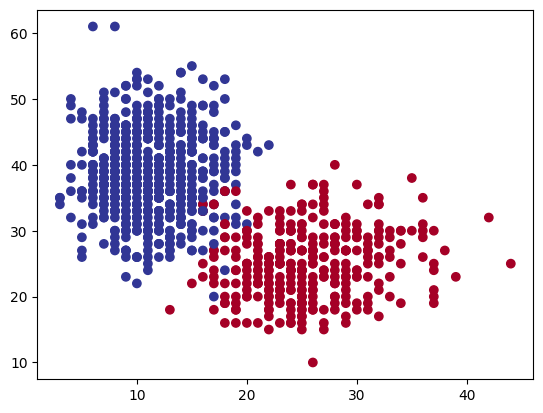

In [27]:
#data = pd.DataFrame({"X1": X[:,0], "X2":X[:,1], "Label": y})
# viewing samples of features and labels
#print(f"X sample--> {X[0]} \n y sample--> {y[0]}")
X,y = make_multilabel_classification(1000,2,n_classes=1,random_state=13)
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train.shape
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [51]:
class Classifier(nn.Module):
    def __init__(self,x) -> None:
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(2,x),
            nn.ReLU(),
            nn.Linear(x,1),            
            nn.ReLU()
        )
    def forward(self,x):
        return self.network(x)

In [58]:
Model = Classifier(8)
loss_fcn = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(params=Model.parameters(),lr=0.01)

In [53]:
def accuracy(y_true,y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100 
    return acc

In [60]:
a = Model(X_train[0])
torch.round(a)


tensor([8.9953], grad_fn=<ReluBackward0>)

In [68]:
epochs = 10
total = 0
correct = 0

for epoch in range(epochs):
    
    Model.train()
    pred = Model(X_train)
    
    pred_prob = torch.round(torch.sigmoid(pred))
    loss = loss_fcn(pred,y_train)
    acc = accuracy(y_train,pred_prob)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"Epoch: {epoch} |, loss : {loss:.2f} |, Acc: | {acc:.2f}%")
    
    #print(f"correct: {correct} |, total:{total} |, predicted_shape: {pred.shape}|,Test_shape: {y_train.shape}")

Epoch: 0 |, loss : 0.26 |, Acc: | 98.71%
Epoch: 1 |, loss : 0.26 |, Acc: | 98.71%
Epoch: 2 |, loss : 0.26 |, Acc: | 98.71%
Epoch: 3 |, loss : 0.26 |, Acc: | 98.86%
Epoch: 4 |, loss : 0.26 |, Acc: | 98.86%
Epoch: 5 |, loss : 0.26 |, Acc: | 98.86%
Epoch: 6 |, loss : 0.26 |, Acc: | 98.57%
Epoch: 7 |, loss : 0.26 |, Acc: | 98.43%
Epoch: 8 |, loss : 0.26 |, Acc: | 98.43%
Epoch: 9 |, loss : 0.26 |, Acc: | 98.43%


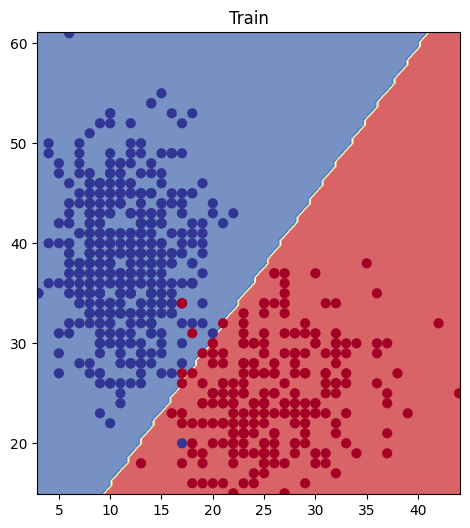

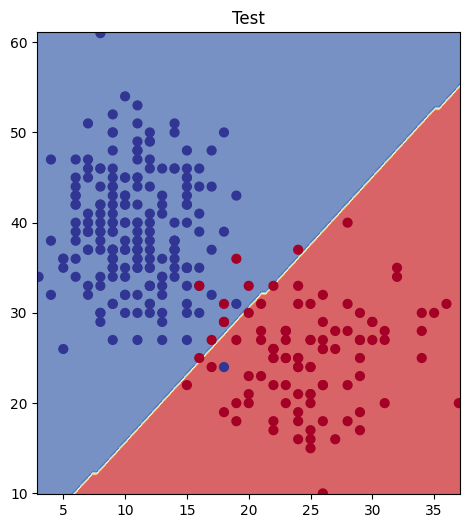

In [66]:
from helper_function import plot_decision_boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(Model,X_train,y_train)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Test")
plot_decision_boundary(Model,X_test,y_test)
